# Concept Learning in Machine Learning

**Objective:** This notebook introduces the fundamental concepts of concept learning in machine learning. We will explore and implement two classic algorithms: Find-S and Candidate-Elimination. This notebook is designed to be an interactive lab session for a machine learning course.

**Author:** Raghav Borikar

---

## 1. Introduction to Concept Learning

Concept learning is a fundamental area of machine learning that involves inferring a Boolean-valued function from training examples of its input and output. In simpler terms, it's about learning a general concept or category from a set of labeled examples. For instance, we might want to learn the concept of "a car that I would like to buy" based on examples of cars we have liked or disliked in the past.

### Key Terminology

*   **Concept:** A category or a subset of objects or events defined by a set of common features. For example, the concept of a "bird" includes features like having feathers, wings, and the ability to fly.
*   **Instances:** The individual examples from which we learn the concept. Each instance is described by a set of attributes.
*   **Attributes:** The features that describe an instance. For a car, attributes could be 'color', 'year', 'engine size', etc.
*   **Target Concept:** The specific concept that we are trying to learn. It is a function that maps instances to a Boolean value (True/False or Yes/No).
*   **Hypothesis (h):** A potential definition of the target concept. Our goal is to find a hypothesis that is identical to the target concept over the entire set of instances.
*   **Hypothesis Space (H):** The set of all possible hypotheses that the learning algorithm can consider.

## 2. The "Enjoy Sport" Dataset

To illustrate the concept learning algorithms, we will use the classic "Enjoy Sport" dataset. This dataset consists of several examples of weather conditions, and the target concept is whether or not it's a good day to play a sport.

The attributes are:
*   `Sky`: Sunny, Cloudy, Rainy
*   `AirTemp`: Warm, Cold
*   `Humidity`: Normal, High
*   `Wind`: Strong, Weak
*   `Water`: Warm, Cool
*   `Forecast`: Same, Change

And the target concept `EnjoySport` can be `Yes` or `No`.

In [5]:
import pandas as pd
import numpy as np

# Create the dataset as a pandas DataFrame
data = {
    'Sky': ['Sunny', 'Sunny', 'Rainy', 'Sunny'],
    'AirTemp': ['Warm', 'Warm', 'Cold', 'Warm'],
    'Humidity': ['Normal', 'High', 'High', 'High'],
    'Wind': ['Strong', 'Strong', 'Strong', 'Strong'],
    'Water': ['Warm', 'Warm', 'Warm', 'Cool'],
    'Forecast': ['Same', 'Same', 'Change', 'Change'],
    'EnjoySport': ['Yes', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

print("The 'Enjoy Sport' Dataset:")
df

The 'Enjoy Sport' Dataset:


,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,Sunny,Warm,High,Strong,Warm,Same,Yes
2,Rainy,Cold,High,Strong,Warm,Change,No
3,Sunny,Warm,High,Strong,Cool,Change,Yes


## 3. The Find-S Algorithm

The Find-S algorithm is a simple concept learning algorithm that finds the most specific hypothesis that is consistent with the positive training examples. It starts with the most specific possible hypothesis and generalizes it as it encounters positive examples that are not covered by the current hypothesis. Negative examples are ignored in this algorithm.

### Algorithm Steps:

1.  Initialize the hypothesis `h` to the most specific hypothesis in the hypothesis space `H`.
2.  For each positive training instance `x`:
    *   For each attribute `a_i` in `h`:
        *   If the constraint `a_i` in `h` is not satisfied by `x`:
            *   Replace `a_i` in `h` with the next more general constraint that is satisfied by `x`.
3.  Output the final hypothesis `h`.

In [8]:
def find_s_algorithm(data):
    """
    Implements the Find-S algorithm.
    """
    # Separate features and target
    features = np.array(data.iloc[:, :-1])
    target = np.array(data.iloc[:, -1])

    # Initialize with the most specific hypothesis
    # Get the first positive example to initialize the hypothesis
    for i, val in enumerate(target):
        if val == 'Yes':
            specific_h = features[i].copy()
            break
            
    print(f"Initial hypothesis: {specific_h}\n")
    
    # Iterate through the training examples
    for i, instance in enumerate(features):
        if target[i] == 'Yes':
            print(f"Processing instance {i+1}: {instance}")
            for j in range(len(specific_h)):
                if instance[j] != specific_h[j]:
                    specific_h[j] = '?'
            print(f"Updated hypothesis: {specific_h}\n")
        else:
            print(f"Ignoring negative instance {i+1}: {instance}\n")

    return specific_h

# Run the Find-S algorithm on our dataset
final_hypothesis = find_s_algorithm(df)

print(f"\nThe final maximally specific hypothesis is: {final_hypothesis}")

Initial hypothesis: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']

Processing instance 1: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Updated hypothesis: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']

Processing instance 2: ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
Updated hypothesis: ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']

Ignoring negative instance 3: ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']

Processing instance 4: ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']
Updated hypothesis: ['Sunny' 'Warm' '?' 'Strong' '?' '?']


The final maximally specific hypothesis is: ['Sunny' 'Warm' '?' 'Strong' '?' '?']


## 4. The Candidate-Elimination Algorithm

The Candidate-Elimination algorithm is a more sophisticated approach to concept learning. Unlike Find-S, it finds the set of all hypotheses that are consistent with the training examples. This set of consistent hypotheses is called the **version space**.

The algorithm maintains two sets of hypotheses:

*   **G (General Boundary):** The set of the most general hypotheses consistent with the training data.
*   **S (Specific Boundary):** The set of the most specific hypotheses consistent with the training data.

### Algorithm Steps:

1.  Initialize `G` to the set containing the most general hypothesis in the hypothesis space `H`.
2.  Initialize `S` to the set containing the most specific hypothesis in `H`.
3.  For each training example `d`:
    *   If `d` is a **positive example**:
        *   Remove from `G` any hypothesis inconsistent with `d`.
        *   For each hypothesis `s` in `S` that is not consistent with `d`:
            *   Remove `s` from `S`.
            *   Add to `S` all minimal generalizations `h` of `s` such that `h` is consistent with `d`, and some member of `G` is more general than `h`.
            *   Remove from `S` any hypothesis that is more general than another hypothesis in `S`.
    *   If `d` is a **negative example**:
        *   Remove from `S` any hypothesis inconsistent with `d`.
        *   For each hypothesis `g` in `G` that is not consistent with `d`:
            *   Remove `g` from `G`.
            *   Add to `G` all minimal specializations `h` of `g` such that `h` is consistent with `d`, and some member of `S` is more specific than `h`.
            *   Remove from `G` any hypothesis that is more specific than another hypothesis in `G`.

In [11]:
def candidate_elimination(data):
    """
    Implements the Candidate-Elimination algorithm.
    """
    features = np.array(data.iloc[:, :-1])
    target = np.array(data.iloc[:, -1])
    
    num_attributes = len(features[0])
    
    # Initialize G and S boundaries
    specific_h = ['0'] * num_attributes
    general_h = [['?'] * num_attributes]
    
    print(f"Initial Specific Boundary (S0): {specific_h}")
    print(f"Initial General Boundary (G0): {general_h}\n")

    for i, instance in enumerate(features):
        print(f"--- Instance {i+1} ---: {instance}")
        if target[i] == "Yes":
            # Remove inconsistent hypotheses from G
            general_h = [g for g in general_h if all(g[j] == '?' or g[j] == instance[j] for j in range(num_attributes))]
            
            # Generalize S
            for j in range(num_attributes):
                if specific_h[j] == '0':
                    specific_h[j] = instance[j]
                elif specific_h[j] != instance[j]:
                    specific_h[j] = '?'

        else: # Negative example
            new_general_h = []
            for g in general_h:
                if all(g[j] == '?' or g[j] == instance[j] for j in range(num_attributes)):
                     for j in range(num_attributes):
                        if g[j] == '?':
                            for val in np.unique(features[:, j]):
                                if val != instance[j]:
                                    temp_h = g[:j] + [val] + g[j+1:]
                                    if any(all(s_val == '?' or s_val == temp_h[k] for k, s_val in enumerate(specific_h)) for k in range(num_attributes)):
                                        new_general_h.append(temp_h)
                else:
                    new_general_h.append(g)
            general_h = new_general_h
            
        print(f"S[{i+1}]: {specific_h}")
        print(f"G[{i+1}]: {general_h}\n")
        
    # Remove redundant hypotheses from G
    final_general_h = []
    for g in general_h:
        is_subsumed = False
        for g2 in general_h:
            if g != g2 and all(g2[j] == '?' or g2[j] == g[j] for j in range(num_attributes)):
                is_subsumed = True
                break
        if not is_subsumed:
            final_general_h.append(g)
    
    return specific_h, final_general_h

s_final, g_final = candidate_elimination(df)
print(f"Final Specific Boundary (S): {s_final}")
print(f"Final General Boundary (G): {g_final}")

Initial Specific Boundary (S0): ['0', '0', '0', '0', '0', '0']
Initial General Boundary (G0): [['?', '?', '?', '?', '?', '?']]

--- Instance 1 ---: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
S[1]: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
G[1]: [['?', '?', '?', '?', '?', '?']]

--- Instance 2 ---: ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
S[2]: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
G[2]: [['?', '?', '?', '?', '?', '?']]

--- Instance 3 ---: ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
S[3]: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
G[3]: []

--- Instance 4 ---: ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']
S[4]: ['Sunny', 'Warm', '?', 'Strong', '?', '?']
G[4]: []

Final Specific Boundary (S): ['Sunny', 'Warm', '?', 'Strong', '?', '?']
Final General Boundary (G): []


## 5. Visualizations

Visualizing the hypothesis space for concept learning can be challenging, especially with multiple attributes. However, we can create visualizations that illustrate the process of the algorithms.

### Visualizing the Find-S Algorithm's Progression

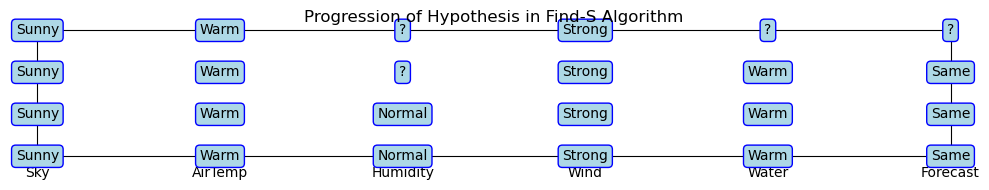

In [13]:
import matplotlib.pyplot as plt

def visualize_find_s(data):
    features = np.array(data.iloc[:, :-1])
    target = np.array(data.iloc[:, -1])
    
    for i, val in enumerate(target):
        if val == 'Yes':
            specific_h = features[i].copy()
            break
            
    hypotheses = [list(specific_h)]
    
    for i, instance in enumerate(features):
        if target[i] == 'Yes':
            for j in range(len(specific_h)):
                if instance[j] != specific_h[j]:
                    specific_h[j] = '?'
            hypotheses.append(list(specific_h))
            
    # Visualization
    fig, ax = plt.subplots(figsize=(10, len(hypotheses) * 0.5))
    ax.set_yticks(np.arange(len(hypotheses)))
    ax.set_yticklabels([f'h{i}' for i in range(len(hypotheses))])
    ax.set_xticks(np.arange(len(data.columns) - 1))
    ax.set_xticklabels(data.columns[:-1])
    
    for i in range(len(hypotheses)):
        for j in range(len(hypotheses[i])):
            ax.text(j, i, hypotheses[i][j], ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', fc='lightblue', ec='b', lw=1))

    ax.set_title("Progression of Hypothesis in Find-S Algorithm")
    plt.tight_layout()
    plt.show()

visualize_find_s(df)

## 6. Student Activity

Now it's your turn to apply what you've learned! Here is a new dataset about whether to wait for a table at a restaurant.

### New Dataset: Restaurant Waiting

In [15]:
restaurant_data = {
    'Alternate': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Bar': ['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
    'Fri/Sat': ['No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Hungry': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Patrons': ['Some', 'Full', 'Some', 'Full', 'Full', 'Some', 'None', 'Some', 'Full', 'Full'],
    'Price': ['$$$', '$', '$', '$', '$$$', '$', '$', '$$', '$', '$$$'],
    'Raining': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No'],
    'Reservation': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Type': ['French', 'Thai', 'Burger', 'Thai', 'French', 'Italian', 'Burger', 'Thai', 'Burger', 'Italian'],
    'WaitEstimate': ['0-10', '30-60', '0-10', '10-30', '>60', '0-10', '0-10', '0-10', '>60', '10-30'],
    'WillWait': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

restaurant_df = pd.DataFrame(restaurant_data)
print("Restaurant Waiting Dataset:")
restaurant_df

Restaurant Waiting Dataset:


,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,WillWait
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,No,Yes,No,Yes,Full,$,No,No,Thai,30-60,No
2,Yes,No,No,No,Some,$,No,Yes,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,No,Yes,Yes,No,Full,$$$,No,No,French,>60,No
5,Yes,Yes,No,Yes,Some,$,Yes,Yes,Italian,0-10,Yes
6,No,No,No,No,None,$,Yes,No,Burger,0-10,No
7,Yes,Yes,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,Yes


### Your Tasks:

1.  **Manual Tracing:**
    *   Manually trace the Find-S algorithm on the `Restaurant Waiting` dataset. Write down the hypothesis after each positive instance.
    *   Manually trace the Candidate-Elimination algorithm for the first 4 instances of the `Restaurant Waiting` dataset. Write down the `S` and `G` boundaries after each instance.

2.  **Implementation:**
    *   Modify and run the `find_s_algorithm` function on the `restaurant_df` DataFrame. What is the final hypothesis?
    *   Modify and run the `candidate_elimination` function on the `restaurant_df` DataFrame. What are the final `S` and `G` boundaries?

3.  **Conceptual Questions:**
    *   What happens to the Find-S algorithm if the first positive example is not representative of the target concept?
    *   What are the limitations of the Candidate-Elimination algorithm when dealing with noisy data (i.e., incorrectly labeled examples)?
    *   If the version space collapses to an empty set, what can you conclude about the training data or the hypothesis space?

### Solution for Task 2 (Implementation)

In [17]:
# Run Find-S on the restaurant dataset
print("--- Running Find-S on Restaurant Data ---")
restaurant_find_s = find_s_algorithm(restaurant_df)
print(f"\nFinal hypothesis from Find-S: {restaurant_find_s}\n")

# Run Candidate-Elimination on the restaurant dataset
print("--- Running Candidate-Elimination on Restaurant Data ---")
s_final_restaurant, g_final_restaurant = candidate_elimination(restaurant_df)
print(f"\nFinal Specific Boundary (S): {s_final_restaurant}")
print(f"Final General Boundary (G): {g_final_restaurant}")

--- Running Find-S on Restaurant Data ---
Initial hypothesis: ['Yes' 'No' 'No' 'Yes' 'Some' '$$$' 'No' 'Yes' 'French' '0-10']

Processing instance 1: ['Yes' 'No' 'No' 'Yes' 'Some' '$$$' 'No' 'Yes' 'French' '0-10']
Updated hypothesis: ['Yes' 'No' 'No' 'Yes' 'Some' '$$$' 'No' 'Yes' 'French' '0-10']

Ignoring negative instance 2: ['No' 'Yes' 'No' 'Yes' 'Full' '$' 'No' 'No' 'Thai' '30-60']

Processing instance 3: ['Yes' 'No' 'No' 'No' 'Some' '$' 'No' 'Yes' 'Burger' '0-10']
Updated hypothesis: ['Yes' 'No' 'No' '?' 'Some' '?' 'No' 'Yes' '?' '0-10']

Processing instance 4: ['Yes' 'No' 'Yes' 'Yes' 'Full' '$' 'No' 'No' 'Thai' '10-30']
Updated hypothesis: ['Yes' 'No' '?' '?' '?' '?' 'No' '?' '?' '?']

Ignoring negative instance 5: ['No' 'Yes' 'Yes' 'No' 'Full' '$$$' 'No' 'No' 'French' '>60']

Processing instance 6: ['Yes' 'Yes' 'No' 'Yes' 'Some' '$' 'Yes' 'Yes' 'Italian' '0-10']
Updated hypothesis: ['Yes' '?' '?' '?' '?' '?' '?' '?' '?' '?']

Ignoring negative instance 7: ['No' 'No' 'No' 'No' 'N